In [1]:
import os
import tweepy as tw
import pandas as pd

In [2]:
consumer_key= '######'
consumer_secret= '#######'
access_token= '$$$$$$#$#'
access_token_secret= '^%$####'

In [5]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [7]:
search_term = "#PLA+#BrahMos -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(10000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:10000]

["#India deploys indigenous missiles to counter PLA threat\n\nFrom #BrahMos and #Nirbhay to #Shaurya and #Akash, here's… https://t.co/S4qgw1f3Rd",
 "#India 🇮🇳 successfully test fires Extended Range version of #Brahmos , world's fastest supersonic cruise missile \nI… https://t.co/oHn1U2EusZ",
 'HUGE: #BrahMos, #Nirbhay And #Akash Missiles Deployed by #India to Counter #Chinese Aggression in #Ladakh. 1st admi… https://t.co/cLqepQpwlj',
 '"The #Brahmos and the #Nirbhay cruise missiles along with #Akash surface-to-air missile are at the core of #India’s… https://t.co/GuE9gLExGg',
 'With the deployment of #Brahmos, #Akash and #Nirbhay although precautionary and mirroring the #PLA make me wonder i… https://t.co/qMlwYSl7rK',
 '#Brahmos, #Akash and #Nirbhay: India rolls out its missiles to counter Chinese threat - india news \n#Brahmos ALCM d… https://t.co/i3J7SfFgE4',
 'BrahMos, Nirbhay And Akash Missiles Deployed by India to Counter Chinese Aggression in Ladakh; All You Need to Know… https:/

In [8]:
a=",".join(all_tweets)

In [9]:
import re
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [10]:
wordnet=a.split(' ')

In [11]:
wordnet

['#India',
 'deploys',
 'indigenous',
 'missiles',
 'to',
 'counter',
 'PLA',
 'threat\n\nFrom',
 '#BrahMos',
 'and',
 '#Nirbhay',
 'to',
 '#Shaurya',
 'and',
 '#Akash,',
 "here's…",
 'https://t.co/S4qgw1f3Rd,#India',
 '🇮🇳',
 'successfully',
 'test',
 'fires',
 'Extended',
 'Range',
 'version',
 'of',
 '#Brahmos',
 ',',
 "world's",
 'fastest',
 'supersonic',
 'cruise',
 'missile',
 '\nI…',
 'https://t.co/oHn1U2EusZ,HUGE:',
 '#BrahMos,',
 '#Nirbhay',
 'And',
 '#Akash',
 'Missiles',
 'Deployed',
 'by',
 '#India',
 'to',
 'Counter',
 '#Chinese',
 'Aggression',
 'in',
 '#Ladakh.',
 '1st',
 'admi…',
 'https://t.co/cLqepQpwlj,"The',
 '#Brahmos',
 'and',
 'the',
 '#Nirbhay',
 'cruise',
 'missiles',
 'along',
 'with',
 '#Akash',
 'surface-to-air',
 'missile',
 'are',
 'at',
 'the',
 'core',
 'of',
 '#India’s…',
 'https://t.co/GuE9gLExGg,With',
 'the',
 'deployment',
 'of',
 '#Brahmos,',
 '#Akash',
 'and',
 '#Nirbhay',
 'although',
 'precautionary',
 'and',
 'mirroring',
 'the',
 '#PLA',
 'make

In [12]:
word_list=[]
for x in wordnet:
  if 'http' not in x:
    if'https' not in x:
      word_list.append(x)

word_list

['#India',
 'deploys',
 'indigenous',
 'missiles',
 'to',
 'counter',
 'PLA',
 'threat\n\nFrom',
 '#BrahMos',
 'and',
 '#Nirbhay',
 'to',
 '#Shaurya',
 'and',
 '#Akash,',
 "here's…",
 '🇮🇳',
 'successfully',
 'test',
 'fires',
 'Extended',
 'Range',
 'version',
 'of',
 '#Brahmos',
 ',',
 "world's",
 'fastest',
 'supersonic',
 'cruise',
 'missile',
 '\nI…',
 '#BrahMos,',
 '#Nirbhay',
 'And',
 '#Akash',
 'Missiles',
 'Deployed',
 'by',
 '#India',
 'to',
 'Counter',
 '#Chinese',
 'Aggression',
 'in',
 '#Ladakh.',
 '1st',
 'admi…',
 '#Brahmos',
 'and',
 'the',
 '#Nirbhay',
 'cruise',
 'missiles',
 'along',
 'with',
 '#Akash',
 'surface-to-air',
 'missile',
 'are',
 'at',
 'the',
 'core',
 'of',
 '#India’s…',
 'the',
 'deployment',
 'of',
 '#Brahmos,',
 '#Akash',
 'and',
 '#Nirbhay',
 'although',
 'precautionary',
 'and',
 'mirroring',
 'the',
 '#PLA',
 'make',
 'me',
 'wonder',
 'i…',
 '#Akash',
 'and',
 '#Nirbhay:',
 'India',
 'rolls',
 'out',
 'its',
 'missiles',
 'to',
 'counter',
 'Chin

In [13]:
len(word_list)

118

In [14]:
text1 = ','.join(word_list)
text1

"#India,deploys,indigenous,missiles,to,counter,PLA,threat\n\nFrom,#BrahMos,and,#Nirbhay,to,#Shaurya,and,#Akash,,here's…,🇮🇳,successfully,test,fires,Extended,Range,version,of,#Brahmos,,,world's,fastest,supersonic,cruise,missile,\nI…,#BrahMos,,#Nirbhay,And,#Akash,Missiles,Deployed,by,#India,to,Counter,#Chinese,Aggression,in,#Ladakh.,1st,admi…,#Brahmos,and,the,#Nirbhay,cruise,missiles,along,with,#Akash,surface-to-air,missile,are,at,the,core,of,#India’s…,the,deployment,of,#Brahmos,,#Akash,and,#Nirbhay,although,precautionary,and,mirroring,the,#PLA,make,me,wonder,i…,#Akash,and,#Nirbhay:,India,rolls,out,its,missiles,to,counter,Chinese,threat,-,india,news,\n#Brahmos,ALCM,d…,Nirbhay,And,Akash,Missiles,Deployed,by,India,to,Counter,Chinese,Aggression,in,Ladakh;,All,You,Need,to,Know…"

In [15]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

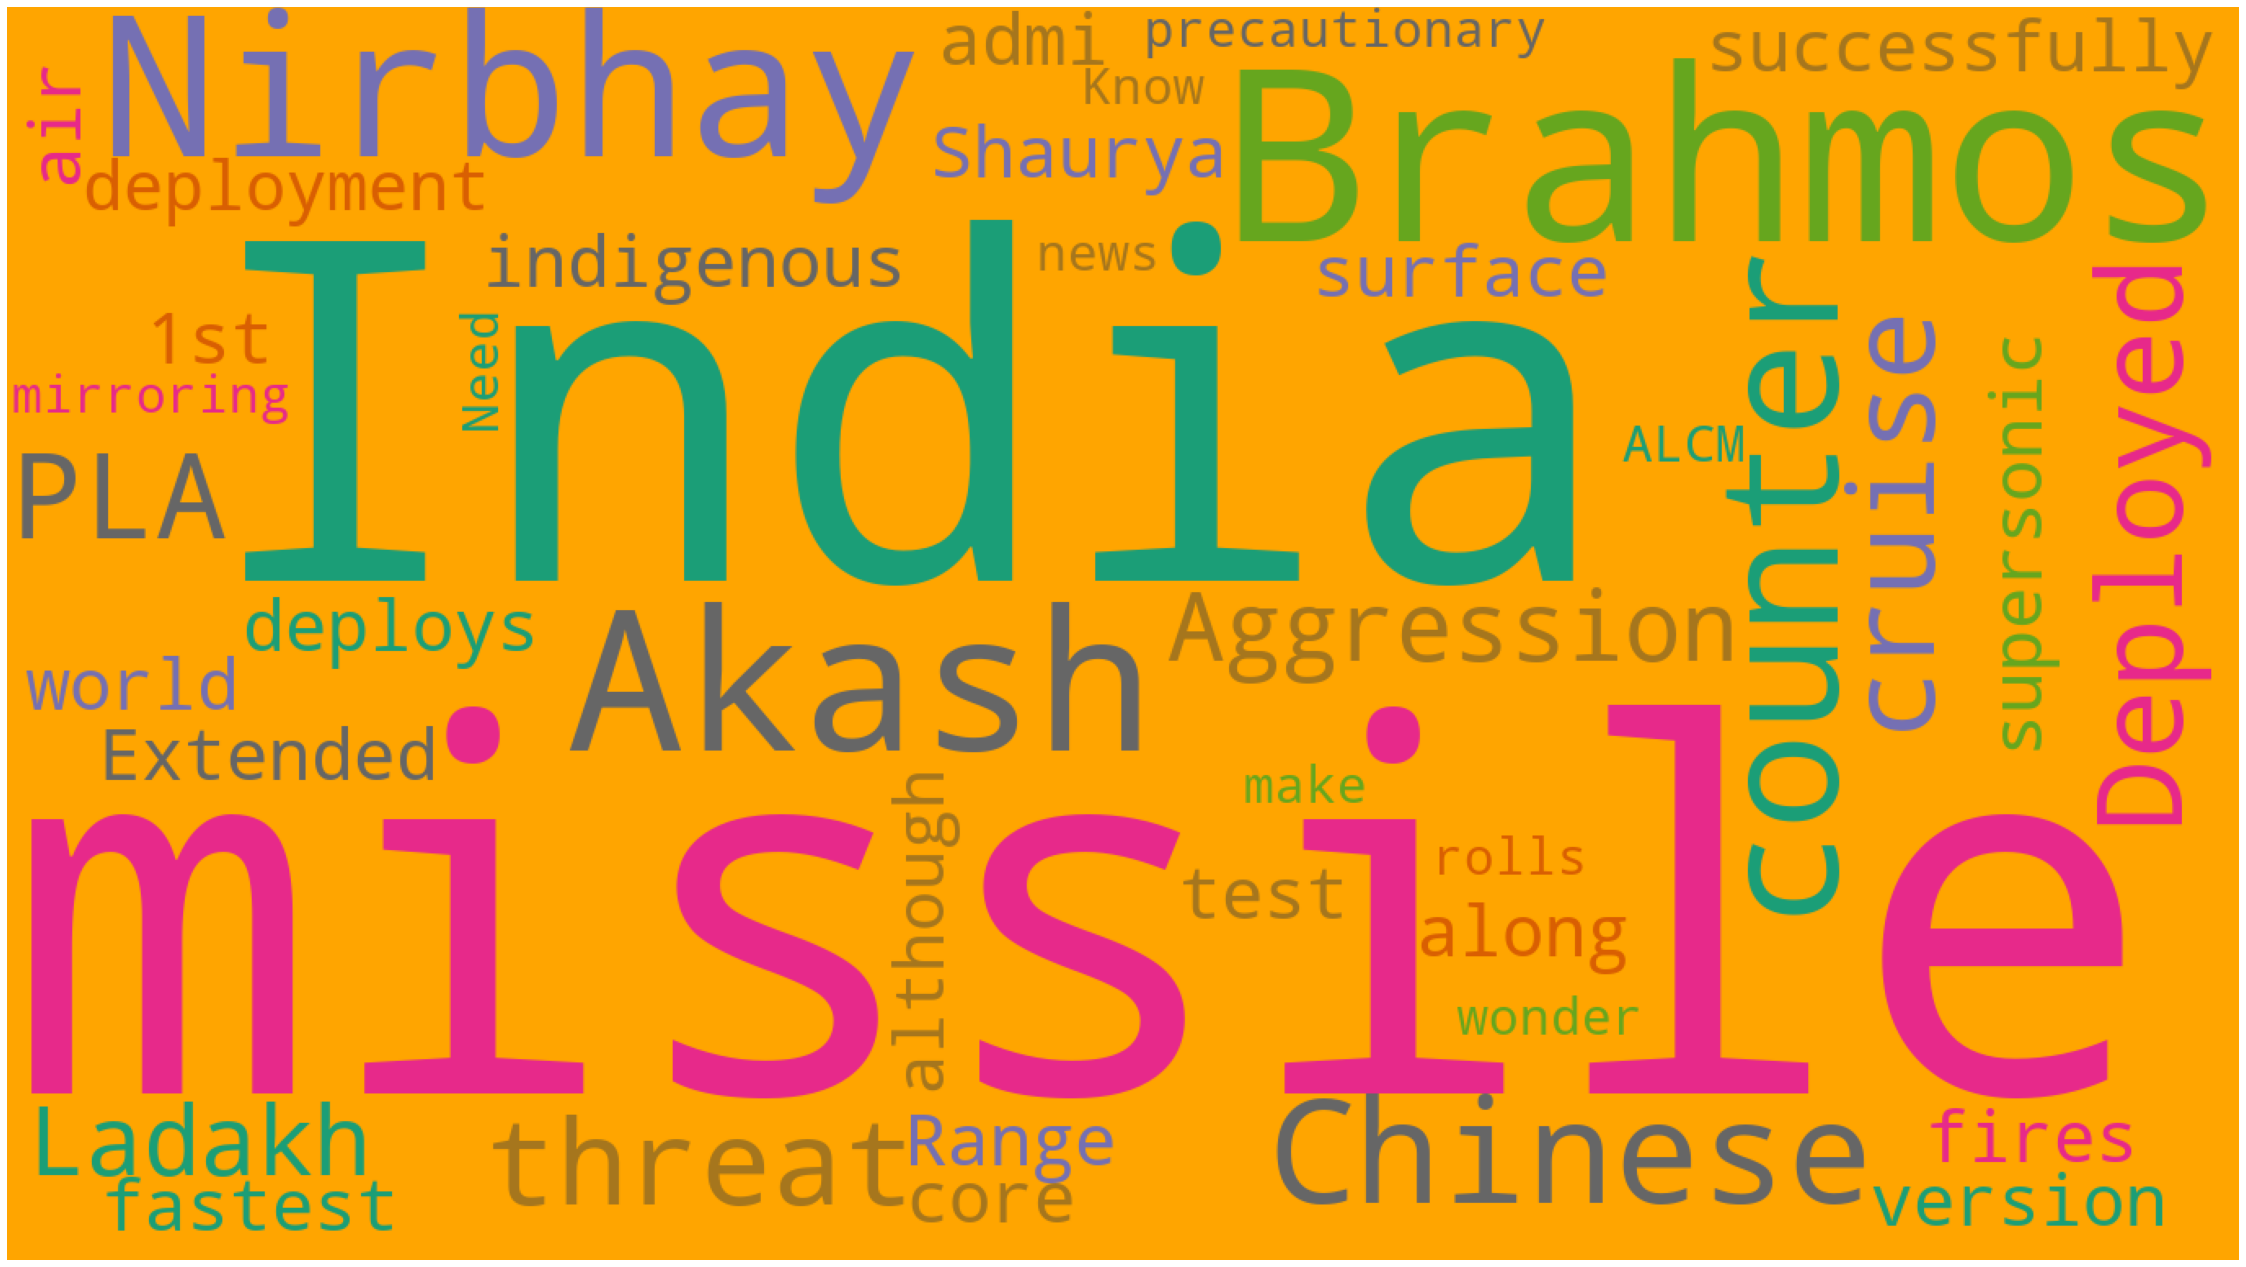

In [17]:
# Generate word cloud
wordcloud = WordCloud(width = 1368, height = 768, random_state=1, background_color='orange', colormap='Dark2', collocations=False, stopwords = STOPWORDS).generate(text1)
# Plot
plot_cloud(wordcloud)